In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# Catboost Initialisation

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.2 MB/s eta 0:00:00


### Checking if Catboost works:
from the official cite: https://catboost.ai/docs/en/concepts/python-quickstart

In [ ]:
import numpy as np

from catboost import CatBoostClassifier, Pool

# initialize data
train_data = np.random.randint(0,
                               100,
                               size=(100, 10))

train_labels = np.random.randint(0,
                                 2,
                                 size=(100))

test_data = catboost_pool = Pool(train_data,
                                 train_labels)

model = CatBoostClassifier(iterations=2,
                           depth=2,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=True)
# train the model
model.fit(train_data, train_labels)
# make the prediction using the resulting model
preds_class = model.predict(test_data)
preds_proba = model.predict_proba(test_data)
print("class = ", preds_class)
print("proba = ", preds_proba)

0:	learn: 0.6573537	total: 46.1ms	remaining: 46.1ms
1:	learn: 0.6380161	total: 46.3ms	remaining: 0us
class =  [0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1]
proba =  [[0.52512684 0.47487316]
 [0.52512684 0.47487316]
 [0.42377327 0.57622673]
 [0.52512684 0.47487316]
 [0.62620214 0.37379786]
 [0.52512684 0.47487316]
 [0.62620214 0.37379786]
 [0.52512684 0.47487316]
 [0.65986605 0.34013395]
 [0.62620214 0.37379786]
 [0.46118173 0.53881827]
 [0.62620214 0.37379786]
 [0.62620214 0.37379786]
 [0.62620214 0.37379786]
 [0.52512684 0.47487316]
 [0.62620214 0.37379786]
 [0.62620214 0.37379786]
 [0.52512684 0.47487316]
 [0.46118173 0.53881827]
 [0.52512684 0.47487316]
 [0.46118173 0.53881827]
 [0.62620214 0.37379786]
 [0.52512684 0.47487316]
 [0.62620214 0.37379786]
 [0.62620214 0.37379786]
 [0.48951737 0.51048263]
 [0.35376849 0.64623151]
 [

# Training Catboost

The dataset might be enough for the simple 8:2 split.
<br>*Might use CV later

In [ ]:
spotify_42k = pd.read_csv('/content/drive/MyDrive/PEARL/Spotify_project/Data/features_catboost.csv')

# Look at the DF
display(spotify_42k.head())
len(spotify_42k)

,track_name,artist_name,danceability,valence,tempo_scaled,energy_loudness_pca_scaled,acousticness,instrumentalness,cluster
0,I Won't Give Up,Jason Mraz,0.483,0.278,0.537886,0.619082,0.6940,0.000000,5
1,93 Million Miles,Jason Mraz,0.572,1.030,0.565207,0.656058,0.4770,0.000014,0
2,Do Not Let Me Go,Joshua Hyslop,0.409,0.290,0.563796,0.555473,0.3380,0.000050,4
3,Fast Car,Boyce Avenue,0.392,1.016,0.826392,0.608021,0.8070,0.000000,5
4,Sky's Still Blue,Andrew Belle,0.430,0.434,0.692947,0.805419,0.0726,0.019300,4


423709

__What is a pool in CatBoost?__
Type of data structure, native to CatBoost. It efficiently dstores and manages the training data set.
<br>
CatBoost Encapsulates:
*   __Training Data__ - holds the features for the model
*   __Target Variable__ - holds the output we want to predict, in this case 'clusters'
*   __Categorical Feature Metadata__ - stores crucial metadata about categorical features. Main strength of the catboost.

This all optimises memory usage



In [ ]:
# Extracting the required features
features = ['danceability', 'valence', 'tempo_scaled', 'energy_loudness_pca_scaled', 'acousticness', 'instrumentalness']
X = spotify_42k[features]
y = spotify_42k['cluster']

# Splitting into 8:2
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42) # at42 keeping the same test/train

# Using CatBoost's POOL
train_pool = Pool(data = X_train, label = Y_train)
test_pool = Pool(data = X_test, label = Y_test)

# Initialising & Training model
model = CatBoostClassifier(
    iterations = 300,
    learning_rate = 0.1,
    depth = 6,
    loss_function = 'MultiClass',
    verbose = 100
)
model.fit(train_pool)

# For the further tests, saving Predict probabilities
probas = model.predict_proba(test_pool)

# Predict & Evaluate
y_pred = model.predict(test_pool)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

0:	learn: 1.3753165	total: 467ms	remaining: 2m 19s
100:	learn: 0.0447788	total: 24.8s	remaining: 48.9s
200:	learn: 0.0297939	total: 48.7s	remaining: 24s
299:	learn: 0.0238665	total: 1m 12s	remaining: 0us
Accuracy: 0.9948077694649643


## Feature Importance for the model

/tmp/ipython-input-50-1959533038.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_importances, x = 'Importance', y = 'Feature', palette ='rocket')


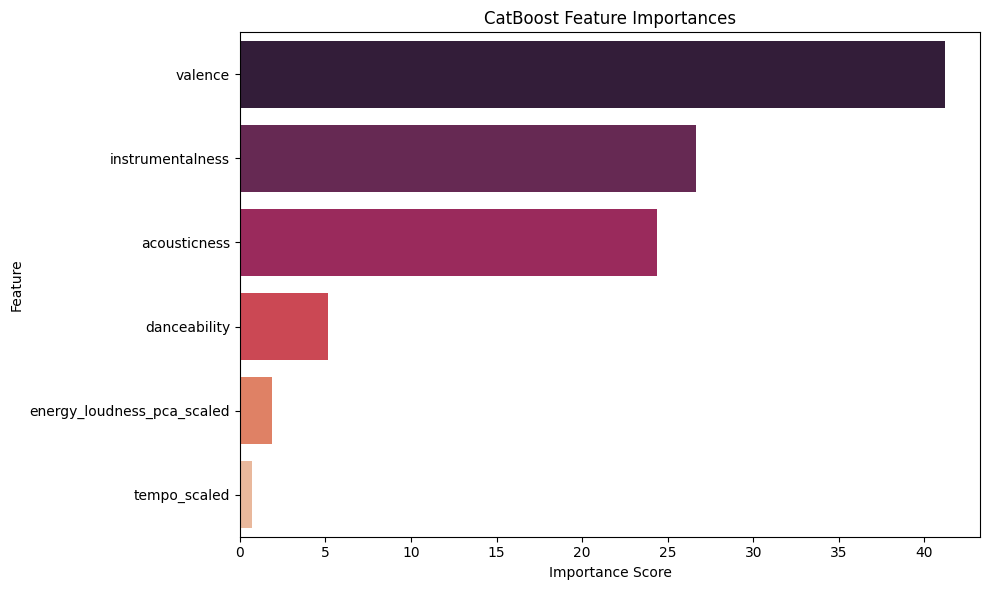

In [ ]:
importances = model.get_feature_importance(train_pool)
feature_names = X_train.columns

# Making a DF
df_importances = pd.DataFrame({
    'Feature': feature_names ,
    'Importance': importances
}).sort_values(by = 'Importance', ascending = False)

# Plotting it:
plt.figure(figsize=(10,6))
sns.barplot(data = df_importances, x = 'Importance', y = 'Feature', palette ='rocket')
plt.title("CatBoost Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

__Results__:
We got the Accuracy of 0.994 = superhigh. might be overfitting.

## Other Test Methods

### 1. Confusion Matrix

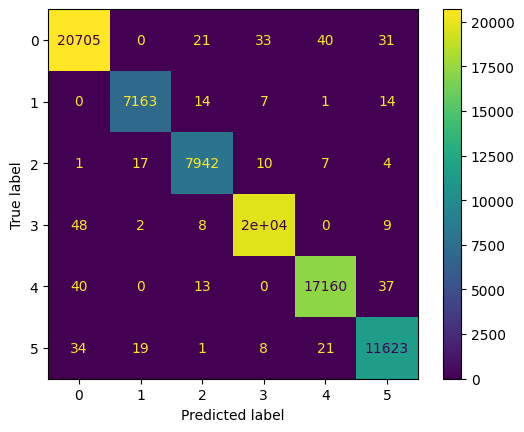

In [ ]:
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

__Interpretation__
<br>
Each cell represents how many of the "Predicted", belonged to the other group.
Overall, our model predicts very well. But we can see weak points of our model:
*   Cluster 3, 4, 5 => Cluster 0 (& Vica Versa)
    <br> We can see from the K-cluster plot, that these clusters are very close



### 2. Classification Report

In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20830
           1       0.99      0.99      0.99      7199
           2       0.99      1.00      0.99      7981
           3       1.00      1.00      1.00     19776
           4       1.00      0.99      1.00     17250
           5       0.99      0.99      0.99     11706

    accuracy                           0.99     84742
   macro avg       0.99      0.99      0.99     84742
weighted avg       0.99      0.99      0.99     84742



__Interpretation__


1.   *Precision* for all classes (0.99 - 1) => Almost always correct
2.   *Recall* for all classes (0.99 - 1) => Almost always correct
3.   *Support* - shows the actual occurrences of each class (= len(spotify_42k))



### 3. Cross-Validation

In [ ]:
model = CatBoostClassifier(iterations=300, learning_rate=0.1, depth=6, loss_function='MultiClass', verbose=0)

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.99454816 0.99388733 0.99402893 0.99471337 0.99479591]
Mean accuracy: 0.9943947388447466


__Interpretation__
<br>
Cross-validation scores are great as well

### 4. Log Loss / Softmax Probabilities


In [ ]:
probas = model.predict_proba(test_pool)
loss = log_loss(Y_test, probas)
print("Log loss:", loss)

Log loss: 0.024738877835124812


# Make the Playlist

In [70]:
# Function for random 15 songs from the same cluster
def get_playlist(df, cluster_id, n=15):
    subset = df[df['cluster'] == cluster_id]
    return subset[['track_name', 'artist_name']].sample(n=n, random_state=0)  # different seed per cluster


In [ ]:
!pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 10.8 MB/s eta 0:00:00


In [ ]:
# Define how many songs per cluster
songs_per_cluster = 15

# Create a writer object for Excel
with pd.ExcelWriter("all_cluster_playlists.xlsx", engine='xlsxwriter') as writer:
    for cluster_id in range(6):  # clusters 0 to 5
        playlist = get_playlist(spotify_42k, cluster_id, n=songs_per_cluster)
        sheet_name = f"Cluster_{cluster_id}"
        playlist.to_excel(writer, sheet_name=sheet_name, index=False)œ

In [71]:
# Define how many songs per cluster
songs_per_cluster = 15

print(get_playlist(spotify_42k, 4, n=songs_per_cluster))

                                               track_name       artist_name
355115                                          I Proceed             Ciara
269382                             AYE! (FREE THE HOMIES)     Vince Staples
106839                                     Ivar's Revenge           Danheim
233919                                      Still We Rise           Rejecta
109773                                       You Are Here  William McDowell
20680                                               Scars      Krizz Kaliko
105515                                  Lavender Town VIP           G Jones
162963                                       Me Guardarás           Nxtwave
173870                                      Let Me Be Sad         I Prevail
226710  Snakes (from the series Arcane League of Legends)             PVRIS
230182                          Beautiful Disaster - Live               311
291981                                    CREEP HARDSTYLE       SICK LEGEND
234581      